<font color='red' size=5><b> Software Requirements: The below scripts are tested in Python version 3.7.0 and Seaborn version 0.9.0</b> </font><br>   
<font color='red' size=5><b> Note: Drug Target Interaction will take more than 60 mins </b> </font><br>   
# <font color='blue'>Drugs re-purposing methods during early stages of pandemic using COVID-19 as example </font> <br>
# <font color='blue'> Important Instructions </font>
## <font color='blue'> Setup DeepPurpose Tool Kit, Working directory, copy files, execute scripts </font>
<font color='blue'> <br>
1) Follow the installation instruction of DeepPurpose tool kit from https://github.com/kexinhuang12345/DeepPurpose <br>
2) After the installation of the tool kit, navigate to the base directory called DeepPurpose from the installed location <br>
3) Create a new directory called all_protein_seq under the data directory <br>
4) Create a new directory called virtual_screening_results under the home/working directory <br>
5) Create a new directory called repurposing_results under the home/working directory <br>
6) Copy the content of all_protein_seq into data/all_protein_seq under home/working directory <br>
7) Copy viral_drugs.csv file into data directory under home/working directory <br>
8) Copy the dataset.py file into deeppurpose/dataset directory <br>
9) Copy the models.py file into deeppurpose/dataset directory <br>
10) Copy the oneliner.py file into deeppurpose/dataset directory <br>
11) Copy this ipython (ipynb) notebook into your home/working directory <br>
12) Ensure that all above files and this ipython notebook (ipynb) are in the home/working directory <br>
13) Execute below scripts by sequence order </font> <br>



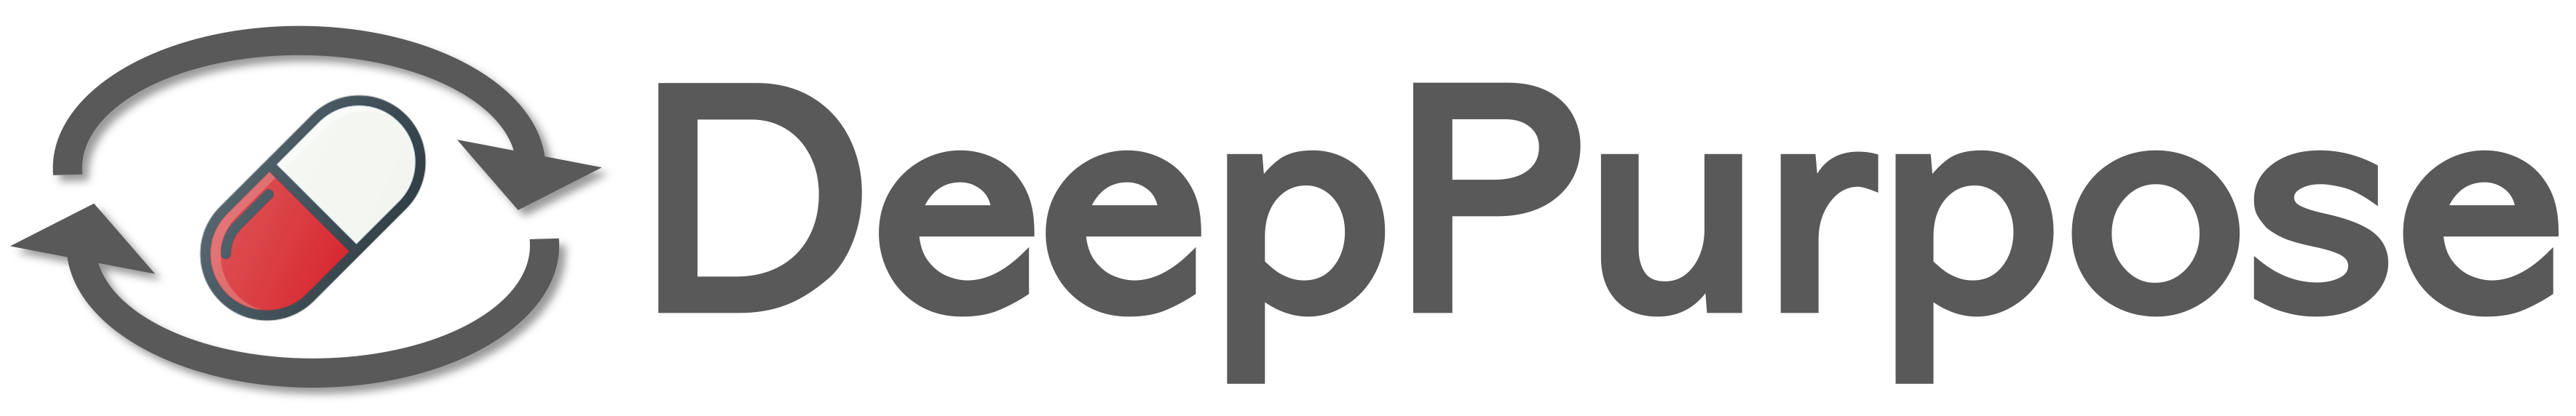

## A Drug-Target Interaction Prediction Toolkit with state-of-the-art Deep Learning Methodsand its Applications in Drug Repurposing and Virtual Screening

## https://arxiv.org/abs/2004.08919

In [2]:
# Load all required packages
import os
from DeepPurpose import utils, models, dataset
from DeepPurpose import utils, models, dataset
import DeepPurpose.oneliner as oneliner
from DeepPurpose import dataset
from DeepPurpose import oneliner
from DeepPurpose.dataset import *
import glob
import shutil
import datetime
import time
from pathlib import Path
import os.path

In [ ]:
#Check for protein sequences
directory = './data/all_protein_seq'

for filename in os.listdir(directory):
    if filename.endswith(".fasta"):
        target, target_name = dataset.load_protein_seq(directory+'/'+filename)
        print(target)
        print(target_name)

## Performance binding score for all protein targets
The most fundamental goal in drug design is to predict whether a given molecule will bind to a target and if so how strongly. Molecular mechanics or molecular dynamics is most often used to estimate the strength of the intermolecular interaction between the small molecule and its biological target. These methods are also used to predict the conformation of the small molecule and to model conformational changes in the target that may occur when the small molecule binds to it.[4][5] Semi-empirical, ab initio quantum chemistry methods, or density functional theory are often used to provide optimized parameters for the molecular mechanics calculations and also provide an estimate of the electronic properties (electrostatic potential, polarizability, etc.) of the drug candidate that will influence binding affinity.[24]

Molecular mechanics methods may also be used to provide semi-quantitative prediction of the binding affinity. Also, knowledge-based scoring function may be used to provide binding affinity estimates. These methods use linear regression, machine learning, neural nets [25][26] or other statistical techniques to derive predictive binding affinity equations by fitting experimental affinities to computationally derived interaction energies between the small molecule and the target.[27][28]

Ideally, the computational method will be able to predict affinity before a compound is synthesized and hence in theory only one compound needs to be synthesized, saving enormous time and cost. The reality is that present computational methods are imperfect and provide, at best, only qualitatively accurate estimates of affinity. In practice it still takes several iterations of design, synthesis, and testing before an optimal drug is discovered. Computational methods have accelerated discovery by reducing the number of iterations required and have often provided novel structures.[29][30]

### Let us now use the protein (FASTA) sequences of related diseases to predict affinity score for drugs which can be repurposed for COVID-19

In [ ]:
#Create functions for saving files and merging the CSV files
def merg_df(path,pattern,dest_file_name):
    all_files = glob.glob(os.path.join(path, pattern+"*.csv"))
    df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
    df_merged   = pd.concat(df_from_each_file, ignore_index=True)
    df_merged.to_csv( path+ "/"+dest_file_name+".csv")


def save_file(target_name,param,dest_dir):
    time.sleep(10)
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    else:
        
        src_dir="./result/" +param+".csv"
        valid_file = Path(src_dir)
        dst_dir="./"+dest_dir+"/"+param+"_"+target_name+".csv"
        os.rename(src_dir,dst_dir)


In [ ]:
#Let us use pre-trained models for predicting drug candidates for COVID-19 using protein sequences of related diseases
from DeepPurpose import models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import pandas as pd

model_list = ['model_CNN_CNN','model_Daylight_AAC','model_Morgan_AAC','model_Morgan_CNN','model_MPNN_CNN','model_Transformer_CNN']

for model in model_list:
    
    MODEL_PATH_DIR = './save_folder/pretrained_models/' + model

    directory = './data/all_protein_seq'


    for filename in os.listdir(MODEL_PATH_DIR):
        if filename.endswith(".pt"):
            targets =[]
            target_names = []
            for filename in os.listdir(directory):
                if filename.endswith(".fasta"):
        #target, target_name = dataset.load_protein_seq(directory+'/'+filename)

                    target, target_name = dataset.load_protein_seq(directory+'/'+filename)

                    target_name = target_name.rstrip("\n")
                    target_name = target_name.replace("/","")
                    target_name = target_name.replace("\\","")
        #targets.append(target)
        #target_names.append(target_name)


                    net = models.model_pretrained(MODEL_PATH_DIR)
                    #net.binary = True
                    
                    df_drugs = pd.read_csv('./data/viral_drugs.csv')
                    df_drugs['target'] =target
                    df_drugs['target_name'] = target_name
                    df_drugs.head()
# Repurpose using the trained model or pre-trained model
# In this example, loading repurposing dataset using Broad Repurposing Hub and SARS-CoV 3CL Protease Target.
#X_repurpose, drug_name, drug_cid = load_broad_repurposing_hub(SAVE_PATH)
#target, target_name = load_SARS_CoV_Protease_3CL()

                    X_repurpose= df_drugs['SMILES']
                    drug_names = df_drugs[' Name']
                    drug_CID = df_drugs['Pubchem CID']
                    targets = df_drugs['target']
                    target_names = df_drugs['target_name']
#print(targets)
#print(target_names)
#print(X_repurpose)
#print(drug_names)
#print(drug_CID)

                    _ = models.repurpose(X_repurpose, targets[0], net, drug_names, target_names[0])
#_ = models.virtual_screening(X_repurpose, target, net, drug_name, target_name)
#X_repurpose, drug_name, target, target_name = ['CCCCCCCOc1cccc(c1)C([O-])=O', ...], ['16007391', ...], ['MLARRKPVLPALTINPTIAEGPSPTSEGASEANLVDLQKKLEEL...', ...], ['P36896', 'P00374']
                    #_ = models.virtual_screening(X_repurpose, targets, net, drug_names, target_names,convert_y=True)
                    target_file_name = model+ '_' + target_name
                    param = "repurposing"
                    dest_dir="repurposing_results"
                    file_name = "repurposing"
                    save_file(target_file_name,param,dest_dir)

dest_dir = "./repurposing_results"
pattern = "repurposing_model_"
final_name = "repurposing_merged"
merg_df(dest_dir,pattern,final_name)

In [ ]:
from DeepPurpose import models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import pandas as pd

model_list = ['model_CNN_CNN','model_Daylight_AAC','model_Morgan_AAC','model_Morgan_CNN','model_MPNN_CNN','model_Transformer_CNN']

for model in model_list:
    
    MODEL_PATH_DIR = './save_folder/pretrained_models/' + model

    directory = './data/all_protein_seq'


    for filename in os.listdir(MODEL_PATH_DIR):
        if filename.endswith(".pt"):
            targets =[]
            target_names = []
            for filename in os.listdir(directory):
                if filename.endswith(".fasta"):
        #target, target_name = dataset.load_protein_seq(directory+'/'+filename)

                    target, target_name = dataset.load_protein_seq(directory+'/'+filename)

                    target_name = target_name.rstrip("\n")
                    target_name = target_name.replace("/","")
                    target_name = target_name.replace("\\","")
        #targets.append(target)
        #target_names.append(target_name)


                    net = models.model_pretrained(MODEL_PATH_DIR)
                    #net.binary = True
                    
                    df_drugs = pd.read_csv('./data/viral_drugs.csv')
                    df_drugs['target'] =target
                    df_drugs['target_name'] = target_name
                    df_drugs.head()
# Repurpose using the trained model or pre-trained model
# In this example, loading repurposing dataset using Broad Repurposing Hub and SARS-CoV 3CL Protease Target.
#X_repurpose, drug_name, drug_cid = load_broad_repurposing_hub(SAVE_PATH)
#target, target_name = load_SARS_CoV_Protease_3CL()

                    X_repurpose= df_drugs['SMILES']
                    drug_names = df_drugs[' Name']
                    drug_CID = df_drugs['Pubchem CID']
                    targets = df_drugs['target']
                    target_names = df_drugs['target_name']
#print(targets)
#print(target_names)
#print(X_repurpose)
#print(drug_names)
#print(drug_CID)

                    #_ = models.repurpose(X_repurpose, targets, net, drug_names, target_names)
#_ = models.virtual_screening(X_repurpose, target, net, drug_name, target_name)
#X_repurpose, drug_name, target, target_name = ['CCCCCCCOc1cccc(c1)C([O-])=O', ...], ['16007391', ...], ['MLARRKPVLPALTINPTIAEGPSPTSEGASEANLVDLQKKLEEL...', ...], ['P36896', 'P00374']
                    _ = models.virtual_screening(X_repurpose, targets, net, drug_names, target_names,convert_y=False)
                    target_file_name = model+ '_' + target_name
                    param = "virtual_screening"
                    dest_dir="virtual_screening_results"
                    save_file(target_file_name,param,dest_dir)

dest_dir = "./virtual_screening_results"
pattern = "virtual_screening_model_"
final_name = "virtual_screening_merged"
merg_df(dest_dir,pattern,final_name)

In [3]:
df_virtual_screening = pd.read_csv('./virtual_screening_results/virtual_screening_merged.csv')
df_virtual_screening.head()

,Unnamed: 0,Unnamed: 0.1,Name,Target,Binding Score
0,0,0,Oseltamivir,">AAQ01596.1 nonstructural polyprotein, partial...",4.35
1,1,1,Nelfinavir,">AAQ01596.1 nonstructural polyprotein, partial...",7.90
2,2,2,Indinavir,">AAQ01596.1 nonstructural polyprotein, partial...",6.12
3,3,3,Penciclovir,">AAQ01596.1 nonstructural polyprotein, partial...",4.91
4,4,4,Cidofovir,">AAQ01596.1 nonstructural polyprotein, partial...",4.05


In [4]:
#df1 = df_virtual_screening.groupby(['Name', 'Binding Score']).mean().reset_index().groupby('Name').mean()
df1 = df_virtual_screening.groupby('Name', as_index=False)['Binding Score'].mean()
df1.sort_values(by='Binding Score', ascending=False).head(50)

,Name,Binding Score
52,Lopinavir,7.586591
24,Darunavir,7.550530
8,Amprenavir,7.246894
5,Alisporivir,7.202273
40,Galidesivir,7.200758
37,Fosamprenavir,7.186288
21,Coblopasvir,7.139318
55,Narlaprevir,7.134394
22,Daclatasvir,7.123636
75,Ruzasvir,7.118409


In [5]:
df_repurposing = pd.read_csv('./repurposing_results/repurposing_merged.csv')
df_repurposing.head()

,Unnamed: 0,Unnamed: 0.1,Name,Target,Binding Score
0,0,0,Oseltamivir,>AWH65941.1 ORF1ab [Middle East respiratory sy...,8.15
1,1,1,Nelfinavir,>AWH65941.1 ORF1ab [Middle East respiratory sy...,8.10
2,2,2,Indinavir,>AWH65941.1 ORF1ab [Middle East respiratory sy...,5.13
3,3,3,Penciclovir,>AWH65941.1 ORF1ab [Middle East respiratory sy...,4.88
4,4,4,Cidofovir,>AWH65941.1 ORF1ab [Middle East respiratory sy...,4.71


In [6]:
#df1 = df_virtual_screening.groupby(['Name', 'Binding Score']).mean().reset_index().groupby('Name').mean()
df1 = df_repurposing.groupby('Name', as_index=False)['Binding Score'].mean()
df1.sort_values(by='Binding Score', ascending=False).head(50)

,Name,Binding Score
52,Lopinavir,7.586591
24,Darunavir,7.550530
8,Amprenavir,7.246894
5,Alisporivir,7.202273
40,Galidesivir,7.200758
37,Fosamprenavir,7.186288
21,Coblopasvir,7.139318
55,Narlaprevir,7.134394
22,Daclatasvir,7.123636
75,Ruzasvir,7.118409


### Based on the above, we can observe that Lopinavir and Galidesivir  are also candidates for COVID-19 as per drugbank search on these candidates. Also note that Remdesivir which is identified as part of previous methods is also a candidate for re-purposing for COVID-19